dt: 0.1
err_eular: 1.6444149377715968e+19
err_backward_eular: 0.2637032629862118
err_crank_nicholson: 0.5601449059734701

time_eular: 8.916854858398438e-05
time_backward_eular: 0.0003981590270996094
time_crank_nicholson: 0.000614166259765625

dt: 0.025
err_eular: 11537907343621.42
err_backward_eular: 0.022776815457423463
err_crank_nicholson: 0.291063383561329

time_eular: 0.00011587142944335938
time_backward_eular: 0.00034880638122558594
time_crank_nicholson: 0.0005869865417480469

dt: 0.00625
err_eular: 6.84918023090915e+21
err_backward_eular: 0.008323655840387462
err_crank_nicholson: 0.03652694086732919

time_eular: 0.00022673606872558594
time_backward_eular: 0.0010371208190917969
time_crank_nicholson: 0.0016169548034667969

dt: 0.0015625
err_eular: 0.013153232859408828
err_backward_eular: 0.0033765333876784854
err_crank_nicholson: 0.0014230509002404836

time_eular: 0.0010030269622802734
time_backward_eular: 0.0035860538482666016
time_crank_nicholson: 0.00662994384765625

dt: 0.00039

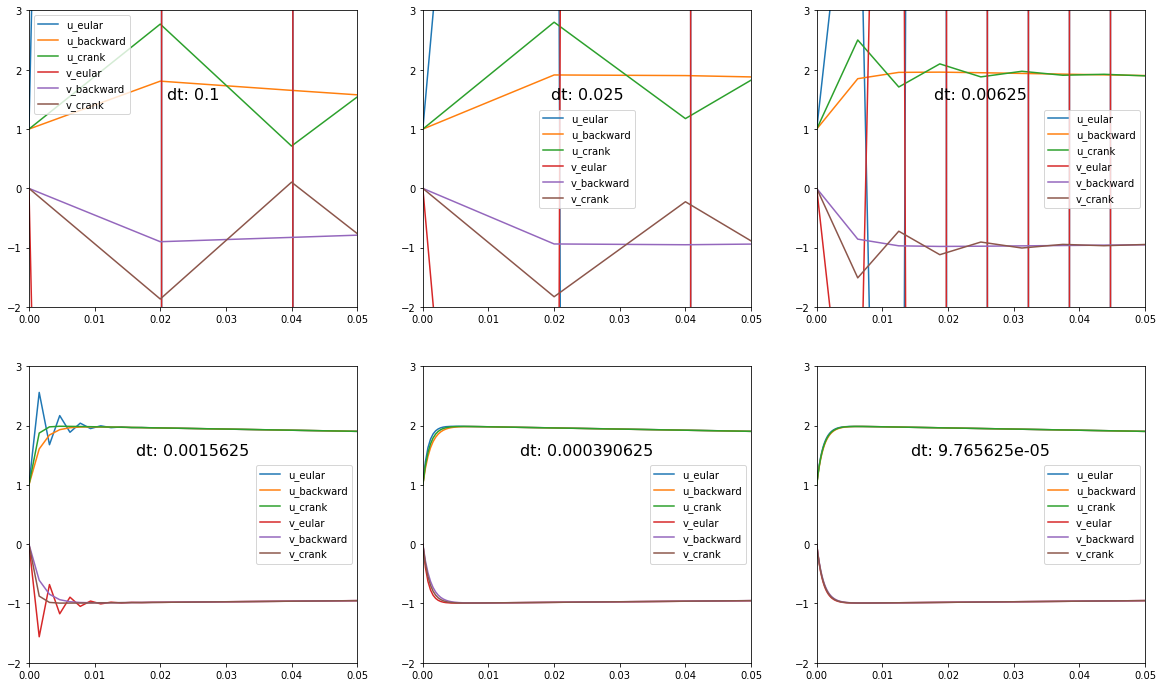

In [42]:
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline


class Eular:
    def __init__(self, l, dt):
        self.l = l
        self.dt = dt

    def step(self, u):
        return u + self.dt * self.l.dot(u)


class BackwardEular:
    def __init__(self, l, dt):
        self.l = l
        self.dt = dt

    def step(self, u):
        return np.linalg.inv(np.eye(len(l[0])) - self.dt * self.l).dot(u)


class CrankNicholson:
    def __init__(self, l, dt):
        self.l = l
        self.dt = dt

    def step(self, u):
        return np.linalg.inv(np.eye(len(l[0])) - self.dt / 2 * self.l).dot(
            np.eye(len(l[0])) + self.dt / 2 * self.l).dot(u)


def simulate(simulator, initial, step_num):
    import copy
    import time
    s = time.time()
    u = copy.deepcopy(initial)
    ret = [u]
    for i in range(step_num):
        u = simulator.step(u)
        ret.append(u)
    elapsed_time = time.time() - s
    return np.array(ret), elapsed_time


if __name__ == '__main__':
    l = np.array([[998, 1998], [-999, -1999]])
    u = np.array([1, 0])
    rows_count = 2
    columns_count = 3
    graph_count = rows_count * columns_count
    axes = []
    dt = 0.1
    fig = plt.figure(figsize=(20, 12))
    errs_eular = []
    errs_backward = []
    errs_crank = []
    ts_eular = []
    ts_backward = []
    ts_crank = []
    
    for i in range(1, graph_count + 1):
        axes.append(fig.add_subplot(rows_count, columns_count, i))
        eular = Eular(l, dt)
        backwardEular = BackwardEular(l, dt)
        crankNicholson = CrankNicholson(l, dt)
        x_end = 0.2
        n_step = max(10, int(x_end / dt))
        ans_eular, t_eular = simulate(eular, u, n_step)
        ans_backward, t_backward = simulate(backwardEular, u, n_step)
        ans_crank, t_crank = simulate(crankNicholson, u, n_step)

        X = np.linspace(0, x_end, n_step + 1)
        ans_correct_u = [2 * np.exp(-x) - np.exp(-1000 * x) for x in X]
        ans_correct_v = [-np.exp(-x) + np.exp(-1000 * x) for x in X]
        err_eular = (np.linalg.norm(ans_eular[:, 0] - ans_correct_u) + np.linalg.norm(
            ans_eular[:, 1] - ans_correct_v)) / (len(X))
        err_backward = (np.linalg.norm(ans_backward[:, 0] - ans_correct_u) + np.linalg.norm(
            ans_backward[:, 1] - ans_correct_v)) / len(X)
        err_crank = (np.linalg.norm(ans_crank[:, 0] - ans_correct_u) + np.linalg.norm(
            ans_crank[:, 1] - ans_correct_v)) / (len(X))

        errs_eular.append(err_eular)
        errs_backward.append(err_backward)
        errs_crank.append(err_crank)
        ts_eular.append(t_eular)
        ts_backward.append(t_backward)
        ts_crank.append(t_crank)
        print('=================================')
        print(f'dt: {dt}')
        print(f'err_eular: {err_eular}')
        print(f'err_backward_eular: {err_backward}')
        print(f'err_crank_nicholson: {err_crank}\n')

        print(f'time_eular: {t_eular}')
        print(f'time_backward_eular: {t_backward}')
        print(f'time_crank_nicholson: {t_crank}\n')

        axes[i - 1].set_xlim([0, 0.05])
        axes[i - 1].set_ylim([-2, 3])
        axes[i - 1].annotate(f'dt: {dt}', xy=(0.5, 0.7), fontsize=16, xycoords='axes fraction',
                             horizontalalignment='center')
        axes[i - 1].plot(X, ans_eular[:, 0], label='u_eular')
        axes[i - 1].plot(X, ans_backward[:, 0], label='u_backward')
        axes[i - 1].plot(X, ans_crank[:, 0], label='u_crank')
        axes[i - 1].plot(X, ans_eular[:, 1], label='v_eular')
        axes[i - 1].plot(X, ans_backward[:, 1], label='v_backward')
        axes[i - 1].plot(X, ans_crank[:, 1], label='v_crank')
        plt.legend()
        dt /= 4
        # axes[i - 1].scatter(X, ans_correct_u)
        # axes[i - 1].scatter(X, ans_correct_v)
#     plt.show()

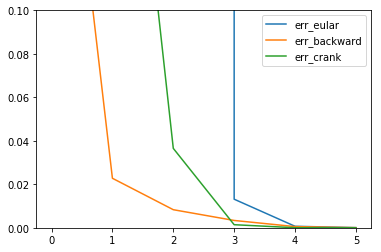

In [52]:
plt.ylim([0, 0.1])
plt.plot(errs_eular, label='err_eular')
plt.plot(errs_backward, label='err_backward')
plt.plot(errs_crank, label='err_crank')
plt.legend()

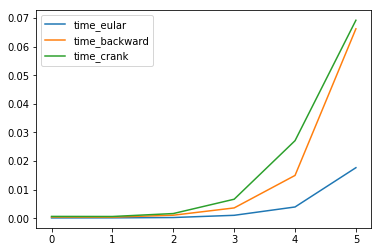

In [55]:
plt.plot(ts_eular, label='time_eular')
plt.plot(ts_backward, label='time_backward')
plt.plot(ts_crank, label='time_crank')
plt.legend()